In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *
import numpy as np
np.random.seed(123)

In [2]:
def make_cluster(means: list, samples=100):
    std_dev = [1] * len(means)  # Standard deviation for both dimensions

    # Generate 2D normally distributed data
    data = np.random.normal(means, std_dev, (samples, 2))
    return data

In [3]:
x1 = make_cluster([2,2])
y1 = np.array([0]*len(x1))
x2 = make_cluster([-2,-2])
y2 = np.array([1]*len(x2))

X = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))

x_min = X[:,0].min(); x_max = X[:,0].max()
x_plot = np.linspace(x_min, x_max, 100)

# Aufgabe: Verändere Steigung und Y-Achsen-Abschnitt so, dass die Linie die beiden Punktewolken voneinander trennt

Es ist schnell zu erkennen, dass die **Daten <i class="fa fa-database" style="font-size:15px"></i>** in zwei Punktwolken liegen. 
Wie kann man als Mensch diese Punktgruppen voneinander trennen?
Das geht ganz einfach, indem man eine Gerade einzeichnet.

<i class="fa fa-laptop" style="font-size:38px"></i> &nbsp;
Versuche in der Abbildung oben die Steigung $m$ und den y-Achsenabschnitt $b$ der Geraden so zu verändern, dass die Linie die Punktwolken trennt.

<IPython.core.display.Javascript object>


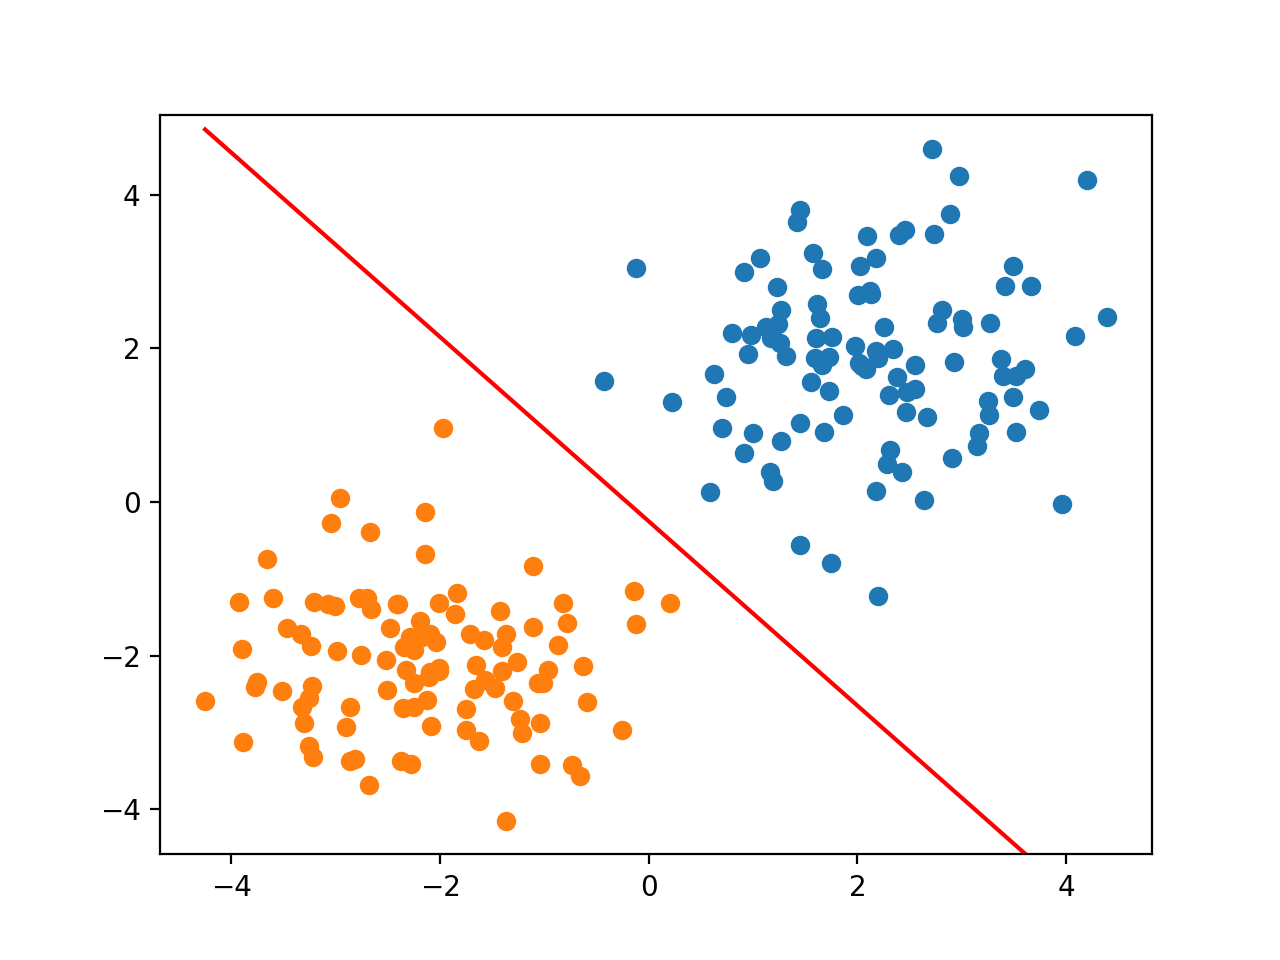

interactive(children=(FloatSlider(value=0.0, description='steigung', max=4.0, min=-4.0), FloatSlider(value=0.0…

In [10]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x1[:,0], x1[:,1])
ax.scatter(x2[:,0], x2[:,1])
line, = ax.plot(x_plot, [0]*len(x_plot), color="red")

def update(steigung = 0.0, abschnitt = 0.0):
 
    y = steigung * x_plot + abschnitt
    line.set_ydata(y)
    fig.canvas.draw_idle()


interact(update, steigung = (-4,4,0.1), abschnitt = (x_min,x_max,0.1));

# Lernen mittels neuronalem Netz:

Bisher haben wir uns überlegt haben, wie wir als Menschen die Daten trennen würden.
Doch wie wird diese Aufgabe im Maschinellen Lernen gelöst?
Um diese Frage zu beantworten, müssen wir uns zunächst für ein **Modell <i class="fa fa-sitemap" style="font-size:16px"></i>** entscheiden.
Eine besonders mächtige und breit genutzte Klasse von Modellen ist die der _künstlichen neuronalen Netze_.
Aus diesem Grund wollen wir ein neuronales Netz benutzen, um unsere Klassifizierungsaufgabe zu lösen.
Wie also funktioniert ein solches neuronales Netz?
Schauen wir uns zunächst die Grundeinheit eines jeden neuronalen Netz an: das Neuron!  
Ein solches besteht aus drei Hauptkomponenten:
- Input
- Neuron
- Output

In der einfachsten Form hat ein neuronales Netz nur ein einziges Neuron, was in der folgenden Grafik dargestellt ist.
Auch wenn es simpel erscheint werden wir sehen, dass ein einzelnes Neuron bereits in der Lage ist, bestimmte Klassifizierungsaufgaben zu lösen!

<img src="../single_neuron.png" width="600"/>

Der Input des Neurons sind die Daten, die klassifiziert werden sollen.
In unserem Beispiel haben wir zweidimensionale Input-Daten.
Das bedeutet, dass jeder Datenpunkt zwei Werte hat; diese lassen sich für jeden Datenpunkt von der x- und y-Achse ablesen. Jede Dimension geht als einzelner Input in das Neuron. Im Bild unten haben wir Beispielsweise einen Datenpunkt herausgesucht, der zur orangen Klasse gehört und die Werte $K=-2$ und $U=1$ aufweist.

<img src="../datenpunkt.png" width="600"/>

Das Neuron selbst hat Gewichte, genannt $w_1$, $w_2$ oder generell $w_n$.
Dabei gibt es genauso viele Gewichte wie Inputs.
Die Gewichte werden benutzt, um eine interne Rechnung zu machen: $z = K \cdot w_1 + U \cdot w_2$. 
Sie legen damit fest, wie stark jedes Merkmal in die Einteilung der verschiedenen Klassen eingeht.
Je größer das Gewicht, desto mehr geht das zugehörige Merkmal, hier $K$ oder $U$, in die Rechnung ein.

Der letzte Teil ist der Output.
Hier wird das Ergebnis $z$ mit einem Schwellenwert $s$ verglichen.
Ist $z < s$, wird der Input der Klasse $A$ zugeordnet.
Ist jedoch $z > s$, so ordnet das Neuron den Input der Klasse $B$ zu.

### Training

Im folgenden Abschnitt trainieren wir ein solches Neuronales Netz. Dafür nutzen wir das Programm Pytorch, welches uns die kompliziertesten Teile abnimmt.Diesen Teil kannst du ruhig überspringen

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

In [6]:
# Convert data to PyTorch tensors
trainX = torch.tensor(X, dtype=torch.float32)
trainy = torch.tensor(y, dtype=torch.float32)

# Generate random permutation of indices
indices = torch.randperm(len(trainX))

# Use the random indices to shuffle both tensors
trainX = trainX[indices]
trainy = trainy[indices]

In [7]:

# Define a simple one neuron NN
class SingleNeuronNN(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(2, 1, bias=False)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Initialize the model
model = SingleNeuronNN()

# Define binary cross-entropy loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(trainX)
    
    # Compute loss
    loss = criterion(outputs, trainy.view(-1, 1))
    
    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1000/10000], Loss: 0.0275
Epoch [2000/10000], Loss: 0.0185
Epoch [3000/10000], Loss: 0.0146
Epoch [4000/10000], Loss: 0.0123
Epoch [5000/10000], Loss: 0.0107
Epoch [6000/10000], Loss: 0.0096
Epoch [7000/10000], Loss: 0.0087
Epoch [8000/10000], Loss: 0.0080
Epoch [9000/10000], Loss: 0.0074
Epoch [10000/10000], Loss: 0.0069


In [8]:
# Evaluate the model
with torch.no_grad():
    predicted = (model(trainX) > 0.5).float()

In [9]:
accuracy = (predicted.view(-1) == trainy).sum() / len(trainy)
accuracy = round(accuracy.item(),3) * 100
print("Unser Modell hat %s Prozent der Daten korrekt vorhergesagt!" % accuracy)

Unser Modell hat 100.0 Prozent der Daten korrekt vorhergesagt!


# Vergleich mit deinen Parametern

Der Code oben hat das Neuronale Netz trainiert, also gute Parameterkombinationen $w_1$ und $w_2$ ermittelt. Im Maschinellen Lernen werden genau diese Gewichte verändert und so lange an den Knöpfen gedreht, bis eine Klassifikation der Daten gelingt.

Doch wie schafft es das Neuron, dieselbe Aufgabe zu erfüllen wie die Gerade im ersten Beispiel?
Tatsächlich tut es genau das Gleiche!

Dies können wir auch mathematisch zeigen.

<details class="details-solution">
<summary><i class="fa fa-exclamation-triangle" style="font-size:20px"></i>  <u>Achtung: Mathematik!</u></summary>

Erinnern wir uns zunächst an die Geradengleichung:

\begin{equation}
U = m \cdot K + b
\end{equation}

Die Äquivalenz können wir nun sehen, wenn wir uns die Gleichung des Neurons genauer anschauen:

\begin{equation}
z = K \cdot w_1 + U \cdot w_2
\end{equation}

Nun wissen wir, dass das Neuron einen Punkt der Klasse $A$ zuordnet, wenn $z<s$ gilt, und der Klasse $B$, wenn $z>s$ gilt. 
Das bedeutet, dass wir bei $z=s$ eine Grenze zwischen den beiden Klassen ziehen können.
Wenn wir $z=s$ einsetzen und nach $U$ umformen, bekommen wir:

\begin{equation}
z = K \cdot w_1 + U \cdot w_2 = s \qquad \Leftrightarrow \qquad U \cdot w_2 = - K \cdot w_1 + s \qquad \Leftrightarrow \qquad U = \left(-\frac{w_1}{w_2}\right) \cdot K + \frac{s}{w_2}
\end{equation}

Hier sehen wir die selbe Geradengleichung wie zu Beginn, wenn wir $m=\left(-\frac{w_1}{w_2}\right)$ und $b=\frac{s}{w_2}$ setzen.
    

</details>

Es besteht also eine direkte Verbindung zwischen der Gerade, die die Punktwolken trennt und den gelernten Gewichten. Man nennt die Gerade auch Decision Boundary (Entscheidungsgrenze), da sie genau den Bereich kennzeichnet, wo das Modell indifferent, also der Output $z$ gleich dem Schwellwert $s$ ist. 

---

Unten Berechnen wir diese Werte für dich. Vergleiche sie mit deinen und setze sie in der Grafik oben ein. Was stellst du fest?

In [30]:
w_1, w_2 = [x for param in model.parameters() for x in param.data.squeeze().numpy()]

In [33]:
print("Die gelernte Steigung ist %s" % -(w_1 / w_2))

Die gelernte Steigung ist -1.2180029


In [35]:
print("Der gelernte y-Achsenabschnitt ist %s" % (0.5 / w_2))

Der gelernte y-Achsenabschnitt ist -0.27616570980274413
